# Homework №1

Course: `Big Data Based Marketing Analytics`    
Authors: ` Turakulov Akramjon, Rakhimkulova Aliia, Yakovlev Petr, Sitdikova Julia`  
Group: `BASB212`   

### Task

You should segment the sample of customer base in order to find the key consumer segments and create the marketing strategy to achieve the company’s goal.  
1. Analyze the data. What features are there in the dataset? Which of them may be useful for the segmentation? Clean the dataset if needed (1 points).
2. Use the cohorts to analyze the customers activity in dynamics. What can be said about the customers behavior? (1.5 points)
3. Perform the cluster analysis. Choose the optimal number of clusters (should be shown) and features (try various combinations to find the most appropriate one). Generate additional features if they are needed. (1.5 points)
4. Describe the customers in each cluster. Which significant characteristics can be underlined? (1 point)
5. Choose the KPI (“metrics of success”) for each segment (what can be grown/ decreased/increased), explain your choice. (1 point)
6. Think of possible marketing initiatives that could potentially drive the chosen metrics for each segment. Generate 3-5 hypothesis and test them using statistical criteria (remember that we can use parametric criteria like t-test only if the data distribution is known). (2 points)
7. Write the marketing strategy based on the results of hypothesis testing. Don’t forget about the communication channels! Suggest the formats and place of communication message delivery (emails, banners in mobile app, etc.). (2 points)

####  Packages importing

In [1]:
import pandas as pd
import numpy as np

# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import seaborn as sns
!pip install chart-studio
!pip install --upgrade xlrd
from chart_studio import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

from sklearn.cluster import KMeans

from operator import attrgetter

!pip install squarify
import squarify

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####  Datasets uploading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/customers_sample.csv', sep =";")
df_transactional = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/transactional_data.csv', sep =",")
df_merchant = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/merchant codes list.xlsx', skiprows=1)

####  Datasets exploration

In [4]:
df_customers

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_transactional.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


In [6]:
df_merchant.head()

,MCC CODE,Program Type:,Unnamed: 2
0,742.0,Veterinary Services,NaN
1,763.0,Agricultural Cooperatives,NaN
2,780.0,Landscaping and Horticultural Services,NaN
3,1520.0,General Contractor/Residential Building,NaN
4,1711.0,"Heating, Plumbing, Air Conditioning Contractors",NaN


#### Missing values checking

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Misses', 1 : '% from all data'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% from all data', ascending=False).round(1)
    print ("Dataframe contains " + str(df.shape[1]) + " columns.\n"      
        "Overall " + str(mis_val_table_ren_columns.shape[0]) +
          " columns with missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(df_customers).style.background_gradient(cmap='Reds')

Dataframe contains 10 columns.
Overall 10 columns with missing values.


,Misses,% from all data
website_last_visit_date,1038800,99.100000
registration_dt,1038664,99.100000
customer_age,1038586,99.000000
uid1,1038575,99.000000
country,1038575,99.000000
city_of_living,1038575,99.000000
email,1038575,99.000000
has_mob_app,1038575,99.000000
phone_number,1038575,99.000000
push,1038575,99.000000


In [9]:
missing_values_table(df_transactional).style.background_gradient(cmap='Reds')

Dataframe contains 5 columns.
Overall 0 columns with missing values.


,Misses,% from all data


In [10]:
missing_values_table(df_merchant).style.background_gradient(cmap='Reds')

Dataframe contains 3 columns.
Overall 2 columns with missing values.


,Misses,% from all data
Unnamed: 2,866,98.300000
MCC CODE,1,0.100000


#### Dropping unused or unnecessary columns/rows

In [11]:
df_customers.dropna(axis=0, inplace=True)
df_merchant.drop(columns=['Unnamed: 2'], inplace=True)
df_merchant[(df_merchant['MCC CODE'].isnull())|(df_merchant['Program Type:'].isnull())]

,MCC CODE,Program Type:
741,NaN,Visa - Non-Financial Institutions - Foreign Cu...


In [12]:
df_merchant.dropna(inplace=True)
missing_values_table(df_merchant).style.background_gradient(cmap='Reds')

Dataframe contains 2 columns.
Overall 0 columns with missing values.


,Misses,% from all data


In [13]:
missing_values_table(df_customers).style.background_gradient(cmap='Reds')

Dataframe contains 10 columns.
Overall 0 columns with missing values.


,Misses,% from all data


#### Renaming columns

In [14]:
df_merchant.rename(columns={'MCC CODE':'mcc_id', 'Program Type:':'program_type'}, inplace=True)
df_merchant.head()

,mcc_id,program_type
0,742.0,Veterinary Services
1,763.0,Agricultural Cooperatives
2,780.0,Landscaping and Horticultural Services
3,1520.0,General Contractor/Residential Building
4,1711.0,"Heating, Plumbing, Air Conditioning Contractors"


#### Secondary data exploration

In [15]:
df_customers.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0


In [16]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9675 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uid1                     9675 non-null   float64
 1   customer_age             9675 non-null   float64
 2   country                  9675 non-null   object 
 3   city_of_living           9675 non-null   object 
 4   registration_dt          9675 non-null   object 
 5   website_last_visit_date  9675 non-null   object 
 6   email                    9675 non-null   float64
 7   has_mob_app              9675 non-null   float64
 8   phone_number             9675 non-null   float64
 9   push                     9675 non-null   float64
dtypes: float64(6), object(4)
memory usage: 831.4+ KB


In [17]:
df_customers.describe()

,uid1,customer_age,email,has_mob_app,phone_number,push
count,9.675000e+03,9675.000000,9675.000000,9675.000000,9675.000000,9675.000000
mean,2.668206e+07,42.638450,0.188424,0.248786,0.996899,0.159690
std,1.494480e+07,20.771041,0.391070,0.432332,0.055601,0.366337
min,8.388000e+03,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.388780e+07,30.000000,0.000000,0.000000,1.000000,0.000000
50%,2.694699e+07,39.000000,0.000000,0.000000,1.000000,0.000000
75%,3.930194e+07,53.000000,0.000000,0.000000,1.000000,0.000000
max,5.281036e+07,221.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print(df_customers.uid1.unique()[:5])
print(df_customers.customer_age.unique()[:5])
print(df_customers.email.unique())
print(df_customers.has_mob_app.unique())
print(df_customers.phone_number.unique())
print(df_customers.push.unique())
print(sorted(df_customers.customer_age.unique()))

[ 8388. 17264. 17373. 26297. 27044.]
[46. 20. 31. 27. 41.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 221.0]


In [19]:
pd.qcut(df_customers['customer_age'], 5)

0        (44.0, 57.0]
1       (8.999, 28.0]
2        (28.0, 36.0]
3       (8.999, 28.0]
4        (36.0, 44.0]
            ...      
9994     (28.0, 36.0]
9995     (36.0, 44.0]
9996     (44.0, 57.0]
9997     (36.0, 44.0]
9998     (36.0, 44.0]
Name: customer_age, Length: 9675, dtype: category
Categories (5, interval[float64, right]): [(8.999, 28.0] < (28.0, 36.0] < (36.0, 44.0] <
                                           (44.0, 57.0] < (57.0, 221.0]]

In [20]:
df_customers['age_category'] = pd.qcut(df_customers['customer_age'], 5, labels = ["below 28"
                                                                                ,"from 29 to 36"
                                                                                ,"from 37 to 44"
                                                                                ,"from 45 to 57"
                                                                                ,"above 58"])
df_customers.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,age_category
0,8388.0,46.0,RUSSIA,Kazan,18.02.2017,01.05.2019,0.0,0.0,1.0,0.0,from 45 to 57
1,17264.0,20.0,RUSSIA,Sevastopol,21.07.2020,03.10.2021,0.0,0.0,1.0,0.0,below 28
2,17373.0,31.0,RUSSIA,Kazan,26.02.2016,24.12.2018,0.0,1.0,1.0,0.0,from 29 to 36
3,26297.0,27.0,RUSSIA,Sevastopol,25.01.2018,16.04.2018,0.0,1.0,1.0,1.0,below 28
4,27044.0,41.0,RUSSIA,Sevastopol,17.07.2015,30.07.2016,0.0,0.0,0.0,0.0,from 37 to 44


In [21]:
df_transactional.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


In [22]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710501 entries, 0 to 4710500
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   uid1             int64  
 1   date_pur         object 
 2   mcc_id           int64  
 3   transaction_amt  float64
 4   transaction_qty  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 179.7+ MB


In [23]:
df_transactional.describe()

,uid1,mcc_id,transaction_amt,transaction_qty
count,4.710501e+06,4.710501e+06,4.710501e+06,4.710501e+06
mean,2.661754e+07,5.538899e+03,7.647642e+02,1.198176e+00
std,1.524182e+07,6.998302e+02,5.888786e+03,9.721578e-01
min,8.388000e+03,7.420000e+02,-8.931200e+05,-9.400000e+01
25%,1.348651e+07,5.411000e+03,1.000000e+02,1.000000e+00
50%,2.677094e+07,5.499000e+03,2.920000e+02,1.000000e+00
75%,3.976003e+07,5.814000e+03,7.290000e+02,1.000000e+00
max,5.281223e+07,9.406000e+03,6.329780e+06,6.800000e+01


In [24]:
print(df_transactional.uid1.unique()[:5])
print(df_transactional.mcc_id.unique()[:5])
print(df_transactional.transaction_amt.unique())
print(df_transactional.transaction_qty.unique())

[14164181 15453249 41571339  2044223 33493259]
[5499 5541 5411 5921 4121]
[ 418.   1034.     57.98 ... 5717.18 4333.76 3176.97]
[  1   4   2   0  -2   3  -1   5   7  -6   6  15  -4   9   8  -3  10  11
  -5  16  -8  -9  13  27  22  18  14  12  35 -12  21  17  -7  20 -11 -10
  19  36 -19 -13 -22  25  29  23  32 -16 -20 -48  51 -14  31 -15 -39 -94
 -17  53  30 -21  24 -25 -18  26  33  41 -29 -45 -28 -55 -38  34  39  43
 -24 -34  28 -82 -26  44 -40 -77  40 -23  68  37]


In [25]:
df_merchant.head()

,mcc_id,program_type
0,742.0,Veterinary Services
1,763.0,Agricultural Cooperatives
2,780.0,Landscaping and Horticultural Services
3,1520.0,General Contractor/Residential Building
4,1711.0,"Heating, Plumbing, Air Conditioning Contractors"


In [26]:
df_merchant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 880
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mcc_id        880 non-null    float64
 1   program_type  880 non-null    object 
dtypes: float64(1), object(1)
memory usage: 20.6+ KB


In [27]:
df_merchant.describe()

,mcc_id
count,880.000000
mean,4488.264773
std,1712.043263
min,742.000000
25%,3373.000000
50%,3685.500000
75%,5598.250000
max,9950.000000


In [28]:
print(df_merchant.mcc_id.unique()[:5])

[ 742.  763.  780. 1520. 1711.]


#### Data type conversion

In [29]:
# convertion to integer
df_customers.loc[:, ['customer_age','email','has_mob_app','phone_number','push']] = df_customers.loc[:, ['customer_age','email','has_mob_app','phone_number','push']].astype(int)
df_merchant['mcc_id'] = df_merchant['mcc_id'].astype(int)
# convertion to datetime
df_customers['registration_dt'] = pd.to_datetime(df_customers['registration_dt'])
df_customers['website_last_visit_date'] = pd.to_datetime(df_customers['website_last_visit_date'])
df_transactional['date_pur'] = pd.to_datetime(df_transactional['date_pur'])

In [30]:
df_customers.head()

,uid1,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,age_category
0,8388.0,46,RUSSIA,Kazan,2017-02-18,2019-01-05,0,0,1,0,from 45 to 57
1,17264.0,20,RUSSIA,Sevastopol,2020-07-21,2021-03-10,0,0,1,0,below 28
2,17373.0,31,RUSSIA,Kazan,2016-02-26,2018-12-24,0,1,1,0,from 29 to 36
3,26297.0,27,RUSSIA,Sevastopol,2018-01-25,2018-04-16,0,1,1,1,below 28
4,27044.0,41,RUSSIA,Sevastopol,2015-07-17,2016-07-30,0,0,0,0,from 37 to 44


In [31]:
df_transactional.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty
0,14164181,2020-09-10,5499,418.00,1
1,15453249,2020-08-10,5541,1034.00,1
2,41571339,2020-09-12,5411,57.98,1
3,2044223,2021-06-28,5921,549.40,4
4,33493259,2020-07-20,4121,578.00,2


In [32]:
df_merchant.head()

,mcc_id,program_type
0,742,Veterinary Services
1,763,Agricultural Cooperatives
2,780,Landscaping and Horticultural Services
3,1520,General Contractor/Residential Building
4,1711,"Heating, Plumbing, Air Conditioning Contractors"


#### Merging dataframes into one

Merging transactions with merchant codes

In [33]:
df_trans_merged = pd.merge(df_transactional, df_merchant, how="left", on=["mcc_id"])
df_trans_merged.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor"
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines


Merging `df_trans_merged` with `df_customers`

In [34]:
df_overall = pd.merge(df_trans_merged, df_customers, how='left',on=["uid1"])
print('Shape of overall dataframe', df_overall.shape)
df_overall.head()

Shape of overall dataframe (4710501, 16)


,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,age_category
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50.0,RUSSIA,Samara,2017-05-12,2019-12-14,1.0,1.0,1.0,1.0,from 45 to 57
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63.0,RUSSIA,Perm,2017-07-11,2019-08-05,0.0,0.0,1.0,0.0,above 58
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets,22.0,RUSSIA,Novokuznetsk,2019-11-13,2020-06-09,0.0,1.0,1.0,1.0,below 28
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33.0,RUSSIA,Voronezh,2018-10-13,2020-08-05,0.0,0.0,1.0,0.0,from 29 to 36
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines,24.0,RUSSIA,Voronezh,2016-09-30,2018-07-27,1.0,0.0,1.0,0.0,below 28


In [35]:
df_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710501 entries, 0 to 4710500
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   uid1                     int64         
 1   date_pur                 datetime64[ns]
 2   mcc_id                   int64         
 3   transaction_amt          float64       
 4   transaction_qty          int64         
 5   program_type             object        
 6   customer_age             float64       
 7   country                  object        
 8   city_of_living           object        
 9   registration_dt          datetime64[ns]
 10  website_last_visit_date  datetime64[ns]
 11  email                    float64       
 12  has_mob_app              float64       
 13  phone_number             float64       
 14  push                     float64       
 15  age_category             category      
dtypes: category(1), datetime64[ns](3), float64(6), int64(3), object(3)
memor

In [36]:
df_overall.loc[:, ['customer_age','email','has_mob_app','phone_number','push']] = df_overall.loc[:, ['customer_age','email','has_mob_app','phone_number','push']].astype('Int64')
df_overall.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,age_category
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50,RUSSIA,Samara,2017-05-12,2019-12-14,1,1,1,1,from 45 to 57
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63,RUSSIA,Perm,2017-07-11,2019-08-05,0,0,1,0,above 58
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets,22,RUSSIA,Novokuznetsk,2019-11-13,2020-06-09,0,1,1,1,below 28
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33,RUSSIA,Voronezh,2018-10-13,2020-08-05,0,0,1,0,from 29 to 36
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines,24,RUSSIA,Voronezh,2016-09-30,2018-07-27,1,0,1,0,below 28


In [37]:
missing_values_table(df_overall).style.background_gradient(cmap='Reds')

Dataframe contains 16 columns.
Overall 11 columns with missing values.


,Misses,% from all data
customer_age,136805,2.900000
country,136805,2.900000
city_of_living,136805,2.900000
registration_dt,136805,2.900000
website_last_visit_date,136805,2.900000
email,136805,2.900000
has_mob_app,136805,2.900000
phone_number,136805,2.900000
push,136805,2.900000
age_category,136805,2.900000


In [38]:
df_overall.shape

(4710501, 16)

negative rows deleted

In [39]:
df_overall.drop(df_overall[(df_overall['transaction_amt'] < 0)].index, inplace = True)
df_overall.shape

(4541638, 16)

#### Cohorts analysis

Use the cohorts to analyze the customers activity in dynamics. What can be said about the
customers behavior? (1.5 points)

In [40]:
df_overall['cohort'] = df_overall.groupby('uid1')['date_pur'].transform('min').dt.to_period('M') 
df_overall.head()

,uid1,date_pur,mcc_id,transaction_amt,transaction_qty,program_type,customer_age,country,city_of_living,registration_dt,website_last_visit_date,email,has_mob_app,phone_number,push,age_category,cohort
0,14164181,2020-09-10,5499,418.00,1,Miscellaneous Food Stores-Convenience Stores a...,50,RUSSIA,Samara,2017-05-12,2019-12-14,1,1,1,1,from 45 to 57,2020-01
1,15453249,2020-08-10,5541,1034.00,1,Service Stations (with or without Ancillary Se...,63,RUSSIA,Perm,2017-07-11,2019-08-05,0,0,1,0,above 58,2020-01
2,41571339,2020-09-12,5411,57.98,1,Grocery Stores and Supermarkets,22,RUSSIA,Novokuznetsk,2019-11-13,2020-06-09,0,1,1,1,below 28,2020-01
3,2044223,2021-06-28,5921,549.40,4,"Package Stores--Beer, Wine, and Liquor",33,RUSSIA,Voronezh,2018-10-13,2020-08-05,0,0,1,0,from 29 to 36,2020-01
4,33493259,2020-07-20,4121,578.00,2,Taxicabs and Limousines,24,RUSSIA,Voronezh,2016-09-30,2018-07-27,1,0,1,0,below 28,2020-01


In [41]:
df_overall['trans_month'] = df_overall['date_pur'].dt.to_period('M')
df_cohort = df_overall.groupby(['cohort', 'trans_month']) \
              .agg(n_customers=('uid1', 'nunique'), transaction_amt_mean=('transaction_amt', 'mean')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.trans_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head()

,cohort,trans_month,n_customers,transaction_amt_mean,period_number
0,2020-01,2020-01,6393,786.398860,0
1,2020-01,2020-02,6170,786.277593,1
2,2020-01,2020-03,6156,784.218249,2
3,2020-01,2020-04,5996,750.454729,3
4,2020-01,2020-05,5988,782.945943,4


In [42]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot.head()

period_number,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01,6393.0,6170.0,6156.0,5996.0,5988.0,6044.0,6051.0,6050.0,6036.0,6024.0,...,5933.0,5889.0,5910.0,5904.0,5883.0,5861.0,5814.0,5819.0,5822.0,5486.0
2020-02,251.0,195.0,179.0,183.0,188.0,181.0,185.0,188.0,191.0,190.0,...,191.0,191.0,195.0,194.0,187.0,192.0,191.0,193.0,155.0,NaN
2020-03,173.0,130.0,131.0,124.0,130.0,132.0,127.0,128.0,129.0,136.0,...,131.0,133.0,130.0,130.0,128.0,133.0,132.0,115.0,NaN,NaN
2020-04,93.0,74.0,73.0,69.0,68.0,67.0,67.0,65.0,67.0,67.0,...,64.0,63.0,68.0,67.0,66.0,66.0,55.0,NaN,NaN,NaN
2020-05,90.0,72.0,68.0,70.0,70.0,69.0,62.0,69.0,66.0,65.0,...,69.0,68.0,68.0,66.0,67.0,58.0,NaN,NaN,NaN,NaN


In [43]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

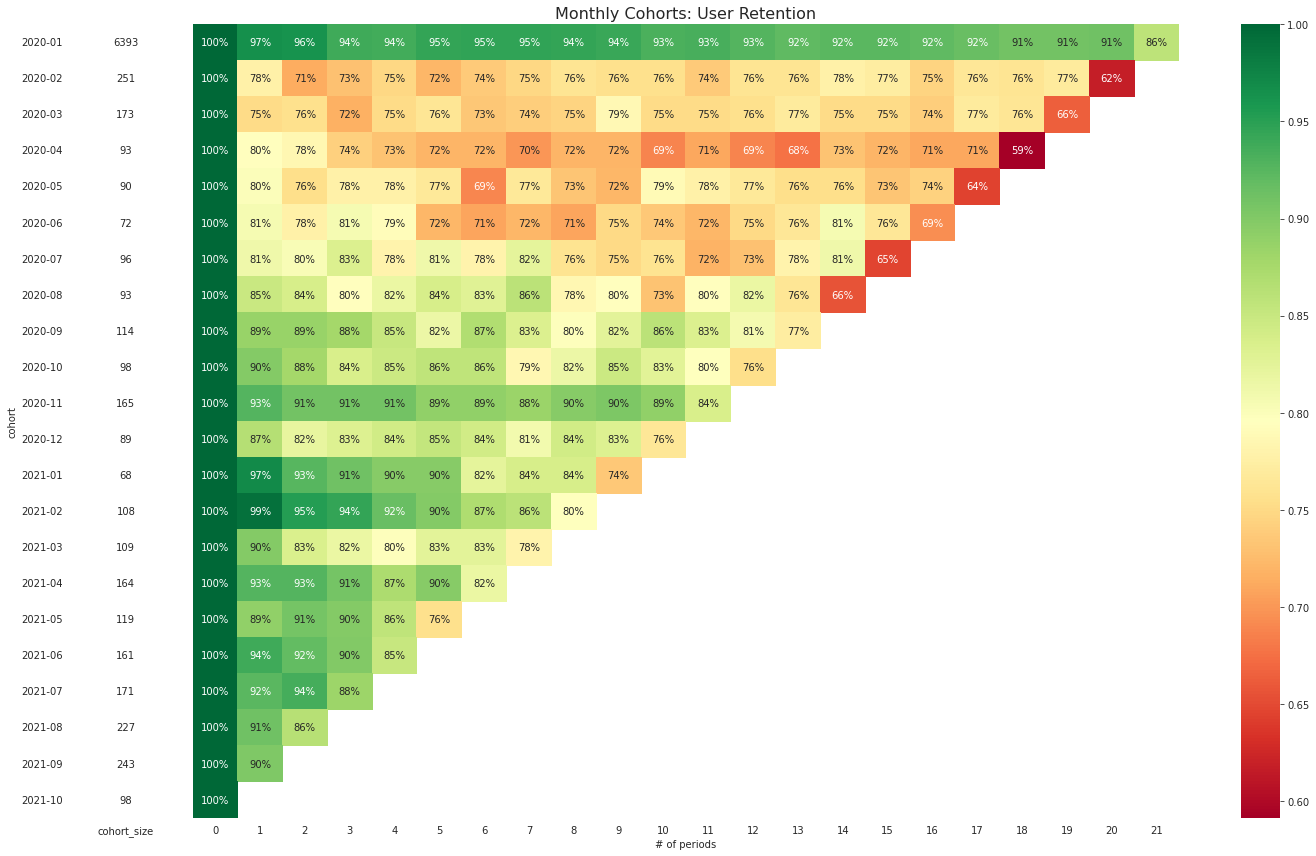

In [44]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

#### RFM analysis

In [45]:
PRESENT = dt.datetime(year=2021, month=10, day=12, hour=23, minute=59, second=59)
rfm = df_overall.groupby('uid1').agg({'date_pur': lambda date: (PRESENT - date.max()).days,
                                        'transaction_qty': lambda num: sum(num),
                                        'transaction_amt': lambda price: price.sum(),
                                        'email': lambda x: x.min(),
                                        'has_mob_app': lambda x: x.min(),
                                        'phone_number': lambda x: x.min(),
                                        'push': lambda x: x.min(),
                                        'age_category': lambda x: x.min()
                                        })
rfm.head()

,date_pur,transaction_qty,transaction_amt,email,has_mob_app,phone_number,push,age_category
uid1,,,,,,,,
8388,1,205,131906.44,0,0,1,0,from 45 to 57
17264,4,706,157605.41,0,0,1,0,below 28
17373,14,492,912990.93,0,1,1,0,from 29 to 36
26297,0,518,182803.35,0,1,1,1,below 28
27044,0,919,979736.35,0,0,0,0,from 37 to 44


In [46]:
rfm.isnull().sum()
rfm[rfm['date_pur'].isnull()]

,date_pur,transaction_qty,transaction_amt,email,has_mob_app,phone_number,push,age_category
uid1,,,,,,,,


In [47]:
rfm.dropna(inplace=True)

In [48]:
rfm.columns=['recency','frequency','monetary','email','has_mob_app','phone_number','push', 'age_category']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary,email,has_mob_app,phone_number,push,age_category
uid1,,,,,,,,
8388,1,205,131906.44,0,0,1,0,from 45 to 57
17264,4,706,157605.41,0,0,1,0,below 28
17373,14,492,912990.93,0,1,1,0,from 29 to 36
26297,0,518,182803.35,0,1,1,1,below 28
27044,0,919,979736.35,0,0,0,0,from 37 to 44


In [49]:
quartiles = rfm.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))
quartiles = quartiles.to_dict()
quartiles

      recency  frequency     monetary  email  has_mob_app  phone_number  push
0.25      0.0     169.00   82931.6625      0            0             1     0
0.50      1.0     485.00  244581.8350      0            0             1     0
0.75      4.0     939.25  516539.8825      0            1             1     0 <class 'pandas.core.frame.DataFrame'>


{'recency': {0.25: 0.0, 0.5: 1.0, 0.75: 4.0},
 'frequency': {0.25: 169.0, 0.5: 485.0, 0.75: 939.25},
 'monetary': {0.25: 82931.6625, 0.5: 244581.835, 0.75: 516539.8825},
 'email': {0.25: 0, 0.5: 0, 0.75: 0},
 'has_mob_app': {0.25: 0, 0.5: 0, 0.75: 1},
 'phone_number': {0.25: 1, 0.5: 1, 0.75: 1},
 'push': {0.25: 0, 0.5: 0, 0.75: 0}}

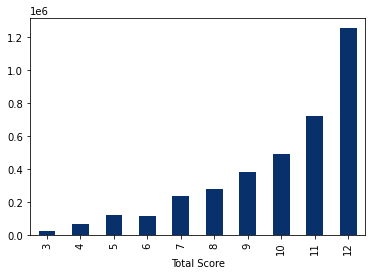

In [50]:
## for Recency 
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
       return 3
    else:
        return 4

rfmSeg = rfm.copy()
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary'].apply(FMClass, args=('monetary',quartiles,))

rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

rfmSeg.sort_values(by=['RFMClass', 'monetary'], ascending=[True, False])
rfmSeg.groupby('RFMClass').agg('monetary').mean()
rfmSeg['Total Score'] = rfmSeg['R_Quartile'] + rfmSeg['F_Quartile'] +rfmSeg['M_Quartile']
rfmSeg.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

In [51]:
rfmSeg['RFMClass'].unique()

array(['322', '232', '134', '432', '434', '143', '211', '111', '122',
       '423', '311', '222', '411', '332', '212', '233', '223', '444',
       '433', '422', '244', '133', '334', '123', '132', '323', '421',
       '443', '124', '221', '333', '344', '412', '424', '342', '312',
       '234', '112', '242', '343', '144', '113', '121', '324', '442',
       '413', '243', '131', '224', '142', '414', '321', '214', '114',
       '231', '431', '313', '441', '331', '213'], dtype=object)

In [52]:
conditions = [
# "Premium Customers" ----------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 444), 
# "Loyal Customers" ------------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 443) 
                | (rfmSeg["RFMClass"].astype(int) == 434) 
                    | (rfmSeg["RFMClass"].astype(int) == 433) |
            (rfmSeg["RFMClass"].astype(int) == 344) 
                | (rfmSeg["RFMClass"].astype(int) == 343) 
                    | (rfmSeg["RFMClass"].astype(int) == 334), 
# "Frequent Buyers" -----------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 442) 
                | (rfmSeg["RFMClass"].astype(int) == 441)
                    | (rfmSeg["RFMClass"].astype(int) == 342) 
                        | (rfmSeg["RFMClass"].astype(int) == 341) | 
            (rfmSeg["RFMClass"].astype(int) == 432) 
                | (rfmSeg["RFMClass"].astype(int) == 431)
                    | (rfmSeg["RFMClass"].astype(int) == 333)
                        | (rfmSeg["RFMClass"].astype(int) == 332) 
                            | (rfmSeg["RFMClass"].astype(int) == 331),
# "Big Spenders" --------------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 424) 
                | (rfmSeg["RFMClass"].astype(int) == 414) 
                    | (rfmSeg["RFMClass"].astype(int) == 324) 
                        | (rfmSeg["RFMClass"].astype(int) == 314) |
            (rfmSeg["RFMClass"].astype(int) == 423) 
                | (rfmSeg["RFMClass"].astype(int) == 413) 
                    | (rfmSeg["RFMClass"].astype(int) == 323) 
                        | (rfmSeg["RFMClass"].astype(int) == 313), 
# "Promising New Customers" ---------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 422) 
                | (rfmSeg["RFMClass"].astype(int) == 421)
                    | (rfmSeg["RFMClass"].astype(int) == 412) 
                        | (rfmSeg["RFMClass"].astype(int) == 411) |
            (rfmSeg["RFMClass"].astype(int) == 322) 
                | (rfmSeg["RFMClass"].astype(int) == 321)
                    | (rfmSeg["RFMClass"].astype(int) == 312) 
                        | (rfmSeg["RFMClass"].astype(int) == 311),
# "Inactive Frequent Buyers" --------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 244) 
                | (rfmSeg["RFMClass"].astype(int) == 243) 
                    | (rfmSeg["RFMClass"].astype(int) == 242) 
                        | (rfmSeg["RFMClass"].astype(int) == 241) |
            (rfmSeg["RFMClass"].astype(int) == 144) 
                | (rfmSeg["RFMClass"].astype(int) == 143) 
                    | (rfmSeg["RFMClass"].astype(int) == 142) 
                        | (rfmSeg["RFMClass"].astype(int) == 141) |
            (rfmSeg["RFMClass"].astype(int) == 232) 
                | (rfmSeg["RFMClass"].astype(int) == 231)
                    | (rfmSeg["RFMClass"].astype(int) == 132) 
                        | (rfmSeg["RFMClass"].astype(int) == 131),
# "Inactive High Value" -------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 234) 
                | (rfmSeg["RFMClass"].astype(int) == 224) 
                    | (rfmSeg["RFMClass"].astype(int) == 214) 
                        | (rfmSeg["RFMClass"].astype(int) == 134) 
                            | (rfmSeg["RFMClass"].astype(int) == 124) |
            (rfmSeg["RFMClass"].astype(int) == 233)
                | (rfmSeg["RFMClass"].astype(int) == 223) 
                    | (rfmSeg["RFMClass"].astype(int) == 213)
                        | (rfmSeg["RFMClass"].astype(int) == 133)
                            | (rfmSeg["RFMClass"].astype(int) == 123), 
# "Inactive Customers" --------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 222) 
                | (rfmSeg["RFMClass"].astype(int) == 221)
                    | (rfmSeg["RFMClass"].astype(int) == 212)
                        | (rfmSeg["RFMClass"].astype(int) == 211),
# "Lost Customers" ------------------------------------------------
            (rfmSeg["RFMClass"].astype(int) == 122) 
                | (rfmSeg["RFMClass"].astype(int) == 121)
                    | (rfmSeg["RFMClass"].astype(int) == 114) 
                        | (rfmSeg["RFMClass"].astype(int) == 113) 
                            | (rfmSeg["RFMClass"].astype(int) == 112)
# "Lost Cheap Customers" ------------------------------------------
                | (rfmSeg["RFMClass"].astype(int) == 111)
]

mappings = ["01 Premium Customers", 
            "02 Loyal Customers", 
            "03 Frequent Buyers", 
            "04 Big Spenders", 
            "05 Promising New Cust", 
            "06 Inactive Frequent",
            "07 Inactive High Value",
            "08 Cheap Customers",
            "09 Lost Customers"]

rfmSeg["RFM_Segment"] = np.select(conditions, mappings, default="09-Lost Customers")
rfmSeg["RFM_Segment"].value_counts()

02 Loyal Customers        1747
09 Lost Customers         1663
05 Promising New Cust     1502
01 Premium Customers      1151
07 Inactive High Value     711
03 Frequent Buyers         673
08 Cheap Customers         633
06 Inactive Frequent       452
04 Big Spenders            376
Name: RFM_Segment, dtype: int64

In [53]:
rfmSeg

,recency,frequency,monetary,email,has_mob_app,phone_number,push,age_category,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RFM_Segment
uid1,,,,,,,,,,,,,,
8388,1,205,131906.44,0,0,1,0,from 45 to 57,3,2,2,322,7,05 Promising New Cust
17264,4,706,157605.41,0,0,1,0,below 28,2,3,2,232,7,06 Inactive Frequent
17373,14,492,912990.93,0,1,1,0,from 29 to 36,1,3,4,134,8,07 Inactive High Value
26297,0,518,182803.35,0,1,1,1,below 28,4,3,2,432,9,03 Frequent Buyers
27044,0,919,979736.35,0,0,0,0,from 37 to 44,4,3,4,434,11,02 Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52794143,0,685,563629.84,0,1,1,1,from 29 to 36,4,3,4,434,11,02 Loyal Customers
52794735,0,2043,2768064.65,1,1,1,1,from 37 to 44,4,4,4,444,12,01 Premium Customers
52801709,3,312,414524.02,0,0,1,0,from 45 to 57,2,2,3,223,7,07 Inactive High Value


In [54]:
rfmSeg.reset_index(inplace =True)
rfmSeg.head()

,uid1,recency,frequency,monetary,email,has_mob_app,phone_number,push,age_category,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RFM_Segment
0,8388,1,205,131906.44,0,0,1,0,from 45 to 57,3,2,2,322,7,05 Promising New Cust
1,17264,4,706,157605.41,0,0,1,0,below 28,2,3,2,232,7,06 Inactive Frequent
2,17373,14,492,912990.93,0,1,1,0,from 29 to 36,1,3,4,134,8,07 Inactive High Value
3,26297,0,518,182803.35,0,1,1,1,below 28,4,3,2,432,9,03 Frequent Buyers
4,27044,0,919,979736.35,0,0,0,0,from 37 to 44,4,3,4,434,11,02 Loyal Customers


In [55]:
for segment in sorted(rfmSeg['RFM_Segment'].unique()):
    print('Statistics to segment: ', segment)
    for channels in ['email','has_mob_app','phone_number','push']:
        print(str(int(rfmSeg[channels][rfmSeg['RFM_Segment'] == segment].sum())) + f' users with {channels} make up ' + 
        str(round(int(rfmSeg[channels][rfmSeg['RFM_Segment'] == segment].sum()) / rfmSeg['uid1'][rfmSeg['RFM_Segment'] == segment].count() * 100)) + '% out of 100%' )
    print('-------------')

Statistics to segment:  01 Premium Customers
378 users with email make up 33% out of 100%
485 users with has_mob_app make up 42% out of 100%
1146 users with phone_number make up 100% out of 100%
318 users with push make up 28% out of 100%
-------------
Statistics to segment:  02 Loyal Customers
385 users with email make up 22% out of 100%
562 users with has_mob_app make up 32% out of 100%
1743 users with phone_number make up 100% out of 100%
368 users with push make up 21% out of 100%
-------------
Statistics to segment:  03 Frequent Buyers
80 users with email make up 12% out of 100%
186 users with has_mob_app make up 28% out of 100%
673 users with phone_number make up 100% out of 100%
127 users with push make up 19% out of 100%
-------------
Statistics to segment:  04 Big Spenders
88 users with email make up 23% out of 100%
96 users with has_mob_app make up 26% out of 100%
375 users with phone_number make up 100% out of 100%
65 users with push make up 17% out of 100%
-------------
Sta

#### Cluster analysis

First of all let's find clusters by each score

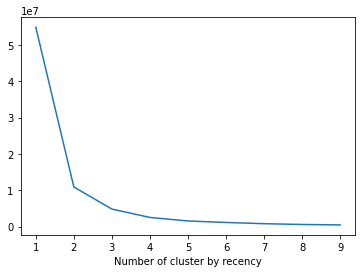

In [56]:
#Finding Optimum Clusters
sse={}
tx_recency = rfm[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster by recency")
plt.show();

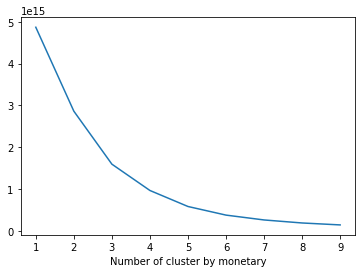

In [57]:
#Finding Optimum Clusters
sse={}
tx_monetary = rfm[['monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_monetary)
    tx_monetary["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster by monetary")
plt.show();

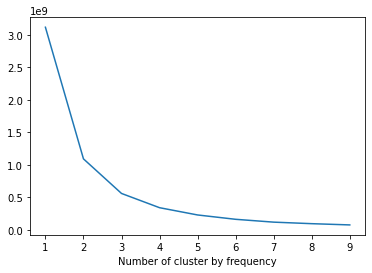

In [58]:
#Finding Optimum Clusters
sse={}
tx_frequency = rfm[['frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster by frequency")
plt.show();

In [59]:
rfm

,recency,frequency,monetary,email,has_mob_app,phone_number,push,age_category
uid1,,,,,,,,
8388,1,205,131906.44,0,0,1,0,from 45 to 57
17264,4,706,157605.41,0,0,1,0,below 28
17373,14,492,912990.93,0,1,1,0,from 29 to 36
26297,0,518,182803.35,0,1,1,1,below 28
27044,0,919,979736.35,0,0,0,0,from 37 to 44
...,...,...,...,...,...,...,...,...
52794143,0,685,563629.84,0,1,1,1,from 29 to 36
52794735,0,2043,2768064.65,1,1,1,1,from 37 to 44
52801709,3,312,414524.02,0,0,1,0,from 45 to 57


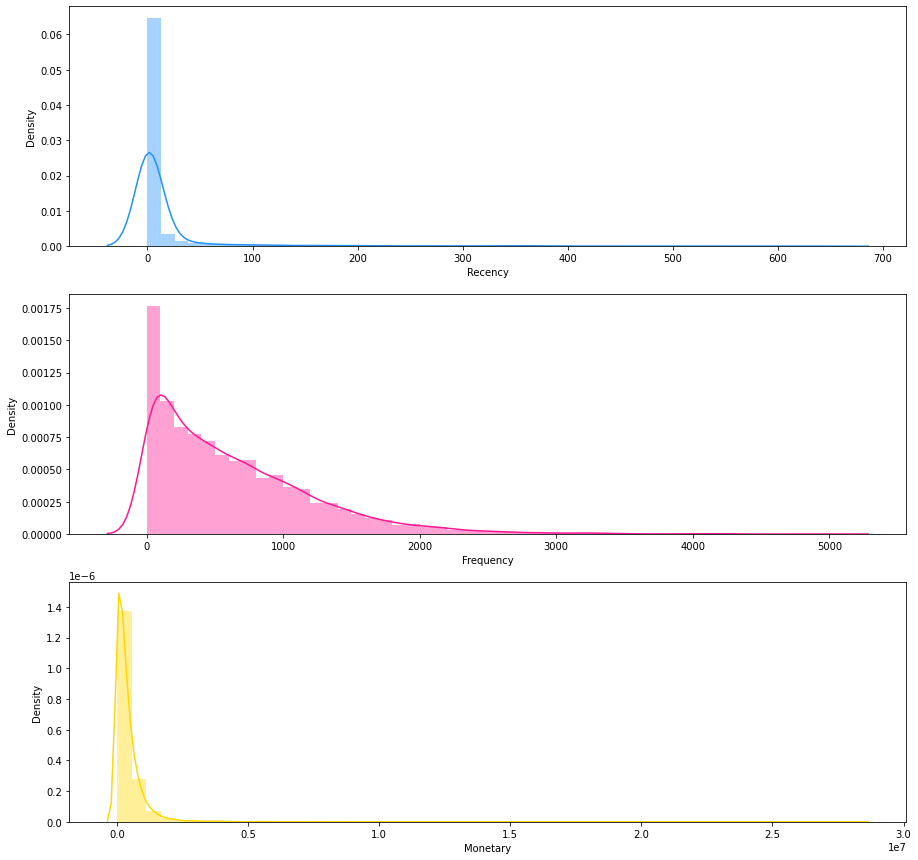

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm.recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm.frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm.monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

Here we see that the distribution of the data is not normal

Now let's try to scale our data

In [61]:
# Create a copy of rfm table
rfm_table_scaled = rfm[['recency','frequency','monetary']].copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.recency = rfm_table_scaled.recency + abs(rfm_table_scaled.recency.min()) + 1
rfm_table_scaled.frequency = rfm_table_scaled.frequency + abs(rfm_table_scaled.frequency.min()) + 1
rfm_table_scaled.monetary = rfm_table_scaled.monetary + abs(rfm_table_scaled.monetary.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,recency,frequency,monetary
count,8908.000000,8908.000000,8.908000e+03
mean,23.151437,635.408958,4.137710e+05
std,78.473379,591.365702,7.391994e+05
min,1.000000,1.000000,1.000000e+00
25%,1.000000,170.000000,8.293266e+04
50%,2.000000,486.000000,2.445828e+05
75%,5.000000,940.250000,5.165409e+05
max,649.000000,4999.000000,2.829533e+07


In [62]:
rfm_table_scaled

,recency,frequency,monetary
uid1,,,
8388,2,206,131907.44
17264,5,707,157606.41
17373,15,493,912991.93
26297,1,519,182804.35
27044,1,920,979737.35
...,...,...,...
52794143,1,686,563630.84
52794735,1,2044,2768065.65
52801709,4,313,414525.02


In [63]:
# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm.index, columns=['recency','frequency','monetary'])

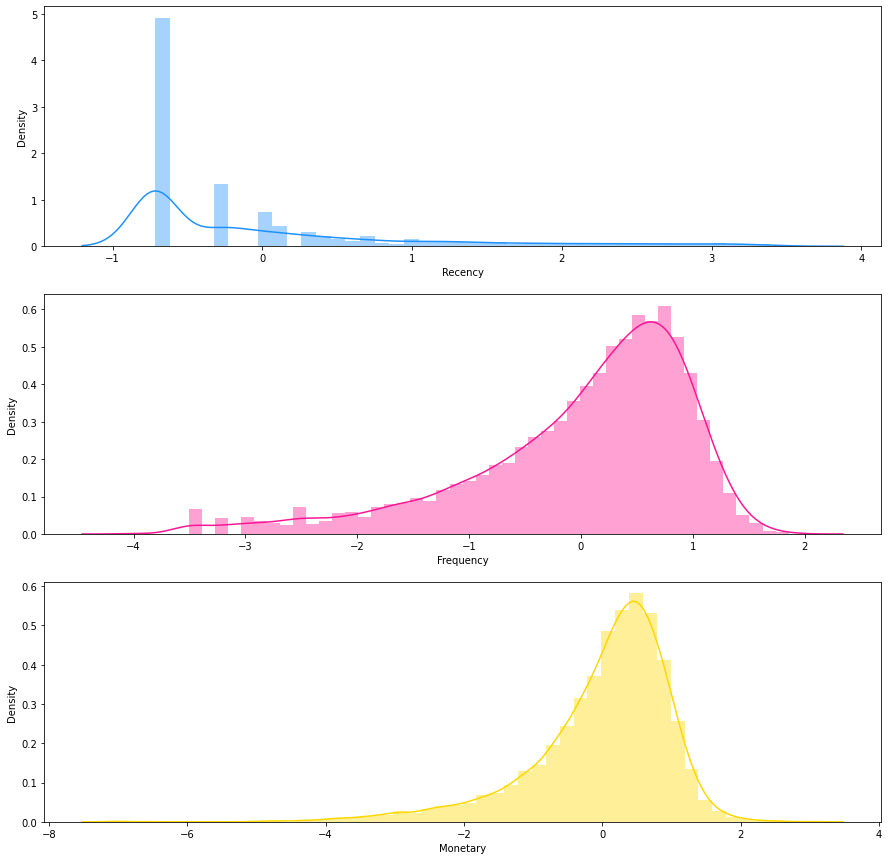

In [64]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

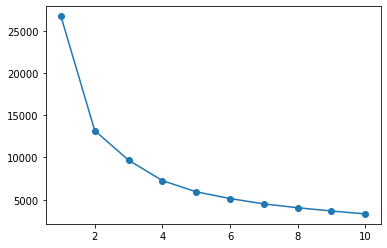

In [65]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

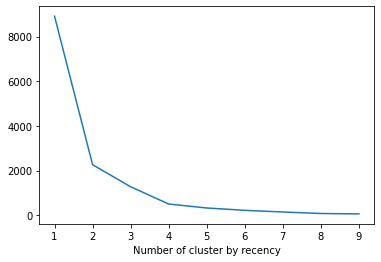

In [66]:
#Finding Optimum Clusters
sse={}
tx_recency = normal_df[['recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster by recency")
plt.show();

From the elbow graph, it seems that good number of cluster would be 3 as after that, its a smooth curve i.e. no change of orientation. But to overcome that confusion, we will use silhouette score method to find the optimum number of clusters because it is often much better in figuring out the number of valid clusters than the elbow method

Silhouette score for number of cluster(s) 2: 0.5314379741500744
Silhouette score for number of cluster(s) 3: 0.4158876944893235
Silhouette score for number of cluster(s) 4: 0.43101714346168846
Silhouette score for number of cluster(s) 5: 0.3576518603066896
Silhouette score for number of cluster(s) 6: 0.3498077539998607
Silhouette score for number of cluster(s) 7: 0.3186727825495725
Silhouette score for number of cluster(s) 8: 0.32329933459708843
Silhouette score for number of cluster(s) 9: 0.316379092741233
Silhouette score for number of cluster(s) 10: 0.31215999483059975
Silhouette score for number of cluster(s) 11: 0.3098254864330745


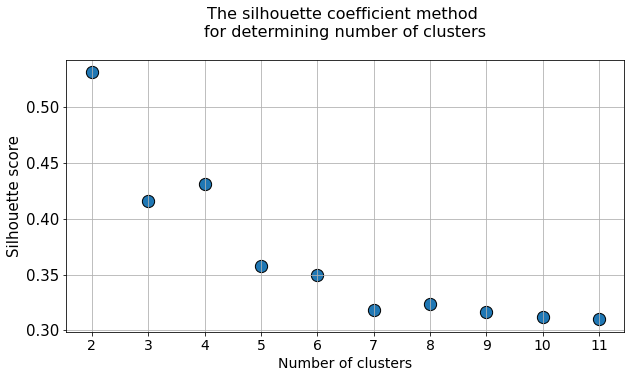

In [67]:
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [68]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_'+cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending = ascending).reset_index(drop=True)
    df_new['index']=df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
  
#Recency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(normal_df[['recency']])
normal_df['RecencyCluster']=kmeans.predict(normal_df[['recency']])
normal_df = order_cluster('RecencyCluster','recency', normal_df, False)

#Frequency Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(normal_df[['frequency']])
normal_df['FrequencyCluster']=kmeans.predict(normal_df[['frequency']])
normal_df = order_cluster('FrequencyCluster','frequency', normal_df, True)

#Monetary Clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(normal_df[['monetary']])
normal_df['MonetaryCluster']=kmeans.predict(normal_df[['monetary']])
normal_df = order_cluster('MonetaryCluster','monetary', normal_df, True)

# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Creating Recency Custer Tag Column
c=normal_df.groupby('RecencyCluster')['recency'].agg(['min','max','mean']).reset_index()
r1='<='+str(c.iloc[2,2]) 
r2=str(c.iloc[1,1])+' to '+str(c.iloc[1,2]) 
r3='>='+str(c.iloc[0,1])
# Create the dictionary 
R ={0 : r3, 1 : r2, 2 : r1} 
normal_df['RecencyClusterTag']=normal_df['RecencyCluster'].apply(set_value, args =(R, )) 

# Creating Frequency Custer Tag Column
a=normal_df.groupby('FrequencyCluster')['frequency'].agg(['min','max','mean']).reset_index()
f1='<='+str(a.iloc[0,2]) 
f2=str(a.iloc[1,1])+' to '+str(a.iloc[1,2]) 
f3='>='+str(a.iloc[2,1])
# Create the dictionary 
F ={0 : f1, 1 : f2, 2 :f3} 
normal_df['FrequencyClusterTag']=normal_df['FrequencyCluster'].apply(set_value, args =(F, )) 

# Creating Monetary Custer Tag Column
b=normal_df.groupby('MonetaryCluster')['monetary'].agg(['min','max','mean']).reset_index()
m1='<='+str(int(round(b.iloc[0,2]))) 
m2=str(int(round(b.iloc[0,2])+1))+' to '+str(int(round(b.iloc[1,2]))) 
m3='>='+str(int(round(b.iloc[1,2])+1))
# Create the dictionary 
M ={0 : m1, 1 : m2, 2 :m3} 
normal_df['MonetaryClusterTag']=normal_df['MonetaryCluster'].apply(set_value, args =(M, )) 

normal_df["FrequencyClusterTag"] = normal_df["FrequencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[f1, f2, f3]))
normal_df["MonetaryClusterTag"] = normal_df["MonetaryClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[m1, m2,m3]))
normal_df["RecencyClusterTag"] = normal_df["RecencyClusterTag"].astype(pd.api.types.CategoricalDtype(categories=[r1, r2,r3]))

In [69]:
c = normal_df.groupby('RecencyCluster')['recency'].agg(['min','max','mean']).reset_index()
c

,RecencyCluster,min,max,mean
0,0,1.374345,3.391735,2.292235
1,1,-0.019751,1.350399,0.428899
2,2,-0.716798,-0.277010,-0.622771


In [70]:
normal_df['OverallScore'] = normal_df['RecencyCluster'] + normal_df['FrequencyCluster'] + normal_df['MonetaryCluster']
normal_df['Segment'] = 'Low-Value'
normal_df.loc[normal_df['OverallScore']>2,'Segment'] = 'Mid-Value' 
normal_df.loc[normal_df['OverallScore']>4,'Segment'] = 'High-Value'  
normal_df.groupby('OverallScore')['recency','frequency','monetary'].mean()

,recency,frequency,monetary
OverallScore,,,
0,2.523379,-2.563501,-2.618650
1,1.262384,-1.962395,-1.796812
2,1.178223,-1.154185,-1.051797
3,0.498179,-0.541296,-0.478065
4,-0.147766,-0.212647,-0.206630
5,-0.153661,0.403650,0.347740
6,-0.634732,0.764461,0.734229


In [71]:
tx_graph = normal_df

#Revenue vs Frequency

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#Revenue Recency

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['monetary'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['monetary'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['recency'],
        y=tx_graph.query("Segment == 'High-Value'")['monetary'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "monetary"},
        xaxis= {'title': "recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Revenue vs Frequency

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['recency'],
        y=tx_graph.query("Segment == 'High-Value'")['frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Customers in “High” cluster: they have the highest frequency and monetary ratio and monetary with low recency ratio.  Looking at other diagrams we can see that they also have low recency with high frequency ratio. These are our most valuable customers for us.

Customers in “Mid” cluster represent similar shopping pattern like cluster “High” but on an average less value for each attributes. These are the loyal customers.

Customers in “Low” cluster they show lower frequency, monetary as well as high recency rates. They are most sleepy and unprofitable customers for us. Some of them are more likely to respond to a campaign and has the potential to turn profitable.

In [72]:
rfmSeg.columns

Index(['uid1', 'recency', 'frequency', 'monetary', 'email', 'has_mob_app',
       'phone_number', 'push', 'age_category', 'R_Quartile', 'F_Quartile',
       'M_Quartile', 'RFMClass', 'Total Score', 'RFM_Segment'],
      dtype='object')

Think of possible marketing initiatives that could potentially drive the chosen metrics for each
segment. Generate 3-5 hypothesis and test them using statistical criteria (remember that we can
use parametric criteria like t-test only if the data distribution is known). (2 points)

In [73]:
rfmSeg

,uid1,recency,frequency,monetary,email,has_mob_app,phone_number,push,age_category,R_Quartile,F_Quartile,M_Quartile,RFMClass,Total Score,RFM_Segment
0,8388,1,205,131906.44,0,0,1,0,from 45 to 57,3,2,2,322,7,05 Promising New Cust
1,17264,4,706,157605.41,0,0,1,0,below 28,2,3,2,232,7,06 Inactive Frequent
2,17373,14,492,912990.93,0,1,1,0,from 29 to 36,1,3,4,134,8,07 Inactive High Value
3,26297,0,518,182803.35,0,1,1,1,below 28,4,3,2,432,9,03 Frequent Buyers
4,27044,0,919,979736.35,0,0,0,0,from 37 to 44,4,3,4,434,11,02 Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,52794143,0,685,563629.84,0,1,1,1,from 29 to 36,4,3,4,434,11,02 Loyal Customers
8904,52794735,0,2043,2768064.65,1,1,1,1,from 37 to 44,4,4,4,444,12,01 Premium Customers
8905,52801709,3,312,414524.02,0,0,1,0,from 45 to 57,2,2,3,223,7,07 Inactive High Value
8906,52808813,0,562,656912.06,0,0,1,0,from 37 to 44,4,3,4,434,11,02 Loyal Customers


#### Hypothesis

1. Big spenders tend to spend more when stimulated through push

In [74]:
import scipy.stats as stats
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['push']==1)].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['push']==0)].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 11964.0
P-value: 0.019861464026612
P-value is less than 0.05. We succeed to reject the null hypothesis


The null hypothesis cannot be accepted, which means that even though the buyers in the Big spenders cluster tend to spend more, an extra push can bring additional results

2. Big spenders tend to buy more frequent  when stimulated through push

In [75]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['push']==1)].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['push']==0)].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 9537.5
P-value: 0.474833393541081
P-value is greater than 0.05. We fail to reject the null hypothesis


The null hypothesis cannot be rejected, which means that an extra push cannot facilitate more frequent buying

3. Big spenders tend to spend more when stimulated through email

In [76]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['email']==1)].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['email']==0)].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 15944.0
P-value: 0.000246074710249
P-value is less than 0.05. We succeed to reject the null hypothesis


The null hypothesis cannot be accepted, which means that even though the buyers in the Big spenders cluster tend to spend more, an extra email can bring additional results

Email and push can be effective in increasing spending within the Big spenders segment

In [77]:
rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 29 to 36')].monetary.sum()

30691511.669999998

In [78]:
rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 37 to 44')].monetary.sum()

32382775.440000005

In [79]:
rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 45 to 57')].monetary.sum()

38510977.77999999

In [80]:
rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='above 58')].monetary.sum()

39792055.61

In [81]:
rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='below 28')].monetary.sum()

17224977.67

4. In the Big spenders segment, there are differences in the level of spending by age groups

In [82]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 45 to 57')].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='above 58')].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')


Statistic: 4964.0
P-value: 0.055007282142022
P-value is greater than 0.05. We fail to reject the null hypothesis


In [83]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 37 to 44')].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='from 45 to 57')].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 2458.0
P-value: 0.097835817966042
P-value is greater than 0.05. We fail to reject the null hypothesis


In [84]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&((rfmSeg['age_category']=='from 37 to 44')|(rfmSeg['age_category']=='from 45 to 57')|(rfmSeg['age_category']=='from 37 to 44'))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&((rfmSeg['age_category']=='below 28')|(rfmSeg['age_category']=='from 29 to 36'))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 10172.0
P-value: 0.097027314171648
P-value is greater than 0.05. We fail to reject the null hypothesis


In [85]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='below 28')].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='04 Big Spenders')&(rfmSeg['age_category']=='above 58')].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 2160.0
P-value: 0.458001812865553
P-value is greater than 0.05. We fail to reject the null hypothesis


It can be seen that none of the tests gave grounds for rejecting the null hypothesis, which means that there is no age correlation within the Big spenders segment.

5. Buyers who spend infrequently, but quite a lot, are mainly middle-aged and older group of people

In [86]:
rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='from 37 to 44')|(rfmSeg['age_category']=='from 45 to 57')|(rfmSeg['age_category']=='above 58'))].monetary.sum()

230414044.41000003

In [87]:
rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='from 29 to 36')|(rfmSeg['age_category']=='below 28'))].monetary.sum()

114972546.76999998

In [88]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='from 37 to 44')|(rfmSeg['age_category']=='from 45 to 57')|(rfmSeg['age_category']=='above 58'))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='below 28')|(rfmSeg['age_category']=='from 29 to 36'))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 58011.0
P-value: 0.690168153316956
P-value is greater than 0.05. We fail to reject the null hypothesis


6. Age does not have a significant statistical effect on spending in the Inactive High Value segment

In [89]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='from 37 to 44')|(rfmSeg['age_category']=='from 45 to 57')|(rfmSeg['age_category']=='above 58'))].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='below 28')|(rfmSeg['age_category']=='from 29 to 36'))].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 44355.5
P-value: 0.000001217503673
P-value is less than 0.05. We succeed to reject the null hypothesis


On the other hand, age has a significant statistical effect (even at the 1% significance level) when estimating the number of purchases.

In these segment there are individuals who might have accumulated a significant amount of wealth. They also spend large amounts of money to live a good lifestyle. Due to their large spending capacity, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

7. Let's check if peple from these segments are somewhat affected by push and email promotion strategies

In [90]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&(rfmSeg['push']==1)].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&(rfmSeg['push']==0)].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 36706.5
P-value: 0.227057299576450
P-value is greater than 0.05. We fail to reject the null hypothesis


In [91]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&(rfmSeg['email']==1)].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&(rfmSeg['email']==0)].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 42459.5
P-value: 0.338819041670814
P-value is greater than 0.05. We fail to reject the null hypothesis


As expected, wealthy people from this segment are not very receptive to the classic promotion option through push or email. Accordingly, it hardly makes sense to incur additional costs for a promo for this segment

8. The presence of email notifications and push notifications affects the decision of the outgoing buyer to purchase

In [92]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='09 Lost Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].recency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='09 Lost Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].recency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 354137.5
P-value: 0.008259801783698
P-value is less than 0.05. We succeed to reject the null hypothesis


In [93]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='09 Lost Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='09 Lost Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 339457.0
P-value: 0.214467076355154
P-value is greater than 0.05. We fail to reject the null hypothesis


Enhanced communication via email or push may deter a customer from completely abandoning services/products, but will not contribute to a significant increase in spending

In [94]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='08 Cheap Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='08 Cheap Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 51682.0
P-value: 0.001776523629233
P-value is less than 0.05. We succeed to reject the null hypothesis


However, such communication for cheap customers can help increase the amount of spending. Accordingly, it is reasonable to redistribute part of the investment in advertising from almost gone buyers to advertising for cheap customers

In [95]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='08 Cheap Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='08 Cheap Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 53311.0
P-value: 0.000137218893653
P-value is less than 0.05. We succeed to reject the null hypothesis


In addition, for groups of cheap customers, communication via email and push channels can also increase the frequency of purchases.

In [96]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='above 58')].monetary.count()

260

In [97]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='below 28')].monetary.count()

480

In [98]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='from 29 to 36')].monetary.count()

258

In [99]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='from 37 to 44')].monetary.count()

223

In [100]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='from 45 to 57')].monetary.count()

281

In [101]:
rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['age_category']=='below 28')].monetary.sum()

31549566.1

According to the available data, potential buyers group consist of high amount of younger age group. 

9. The availability of mobile apllication communication has a statistically significant effect on monetary value of potential buyers

In [102]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['has_mob_app']==1)].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['has_mob_app']==0)].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 199502.0
P-value: 0.000000000750003
P-value is less than 0.05. We succeed to reject the null hypothesis


10. The availability of mobile apllication communication has a statistically significant effect on frequency of purchases of potential buyers

In [103]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['has_mob_app']==1)].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&(rfmSeg['has_mob_app']==0)].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 212451.5
P-value: 0.000000000000000
P-value is less than 0.05. We succeed to reject the null hypothesis


The communication via the mobile app might be highly effective when working with group of potential buyers

In [104]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='05 Promising New Cust')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 249324.5
P-value: 0.000000000065122
P-value is less than 0.05. We succeed to reject the null hypothesis


The communication via the email and push also might be highly effective when working with group of potential buyers

11. Availability of email and push marketing communication have statistical effect on the amount of spending in the cluster of Frequent buyers

In [105]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&((rfmSeg['email']==1)|(rfmSeg['push']==1))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&((rfmSeg['email']==0)|(rfmSeg['push']==0))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 60982.5
P-value: 0.480974259563805
P-value is greater than 0.05. We fail to reject the null hypothesis


We fail to reject null hypothesis, therefore the communication via emails and push might be not effective in the group of frequent buyers

In [106]:
rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['age_category']=='below 28')].frequency.count()

227

In [107]:
rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['age_category']=='from 45 to 57')].monetary.count()

103

In [108]:
rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['age_category']=='from 29 to 36')].monetary.count()

87

In [109]:
rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['age_category']=='from 37 to 44')].monetary.count()

102

In [110]:
rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['age_category']=='above 58')].monetary.count()

154

We can see that the group of frequent buyers are represented with high proportion of younger age customers. Here the aim is to increase the value of purchase

In [111]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['has_mob_app']==1)].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='03 Frequent Buyers')&(rfmSeg['has_mob_app']==0)].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 47050.0
P-value: 0.435615507170080
P-value is greater than 0.05. We fail to reject the null hypothesis


In [112]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='from 37 to 44')|(rfmSeg['age_category']=='from 45 to 57')|(rfmSeg['age_category']=='above 58'))].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='07 Inactive High Value')&((rfmSeg['age_category']=='below 28')|(rfmSeg['age_category']=='from 29 to 36'))].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 44355.5
P-value: 0.000001217503673
P-value is less than 0.05. We succeed to reject the null hypothesis


We succeded to find out statistically that age has significant effect to the monetary aspect of purchases for this cluster. But marketing through mobile apps might be not very effective. These customers are enthusiastic young individuals who enjoy living an interesting lifestyle, we can push them to to spend above their means. Providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment

12. The availability of communication channels has significant statistical effect on the monetary value and frequency of purchases of Premium customers

In [113]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='01 Premium Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1)|(rfmSeg['has_mob_app']==1))].monetary.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='01 Premium Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0)|(rfmSeg['has_mob_app']==0))].monetary.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 369374.0
P-value: 0.005901648586969
P-value is less than 0.05. We succeed to reject the null hypothesis


In [114]:
#perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='01 Premium Customers')&((rfmSeg['email']==1)|(rfmSeg['push']==1)|(rfmSeg['has_mob_app']==1))].frequency.to_list()))
                    ,list(map(float, rfmSeg[(rfmSeg['RFM_Segment']=='01 Premium Customers')&((rfmSeg['email']==0)|(rfmSeg['push']==0)|(rfmSeg['has_mob_app']==0))].frequency.to_list()))
                    ,alternative='two-sided'
                   )
print(f"Statistic: {statistic}")
print('P-value: {:.15f}'.format(p_value))
if p_value > 0.05: 
    print('P-value is greater than 0.05. We fail to reject the null hypothesis')
else: 
    print('P-value is less than 0.05. We succeed to reject the null hypothesis')

Statistic: 356103.5
P-value: 0.160296657957929
P-value is greater than 0.05. We fail to reject the null hypothesis


It is possible to use the main communication channels to increase the spending of premium customers, but the availability of communication channels does not significantly affect the frequency of purchases


#### Additional. EDA

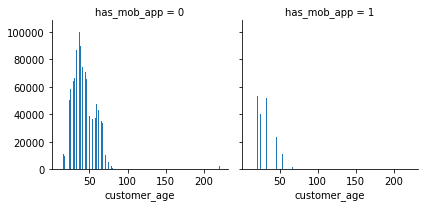

In [129]:
g = sns.FacetGrid(df_overall[(df_overall['has_mob_app'].notnull())&(df_overall['customer_age'].notnull())], col='has_mob_app')
g.map(plt.hist, 'customer_age', bins=500)

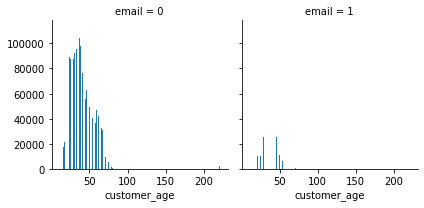

In [130]:
g = sns.FacetGrid(df_overall[(df_overall['email'].notnull())&(df_overall['customer_age'].notnull())], col='email')
g.map(plt.hist, 'customer_age', bins=500)

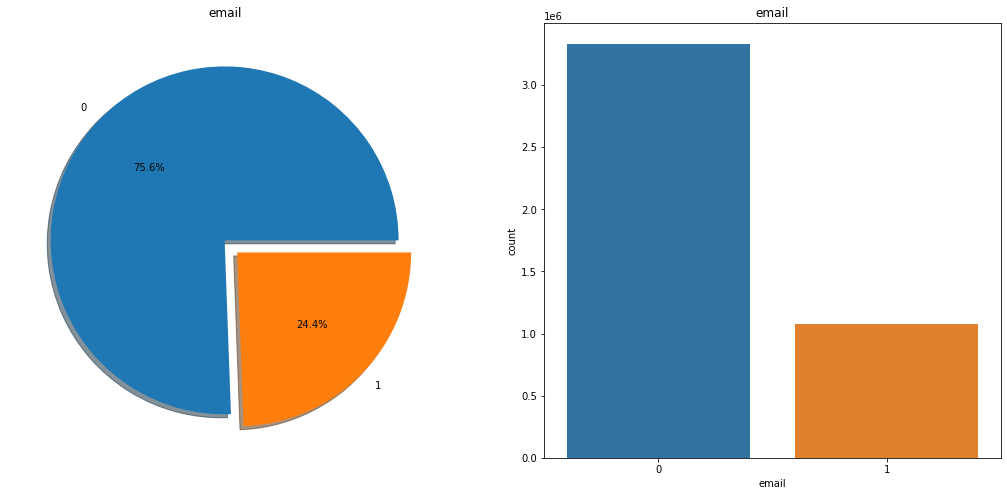

In [132]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_overall['email'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('email')
ax[0].set_ylabel('')
sns.countplot('email',data=df_overall[(df_overall['email'].notnull())],ax=ax[1])
ax[1].set_title('email')
plt.show()

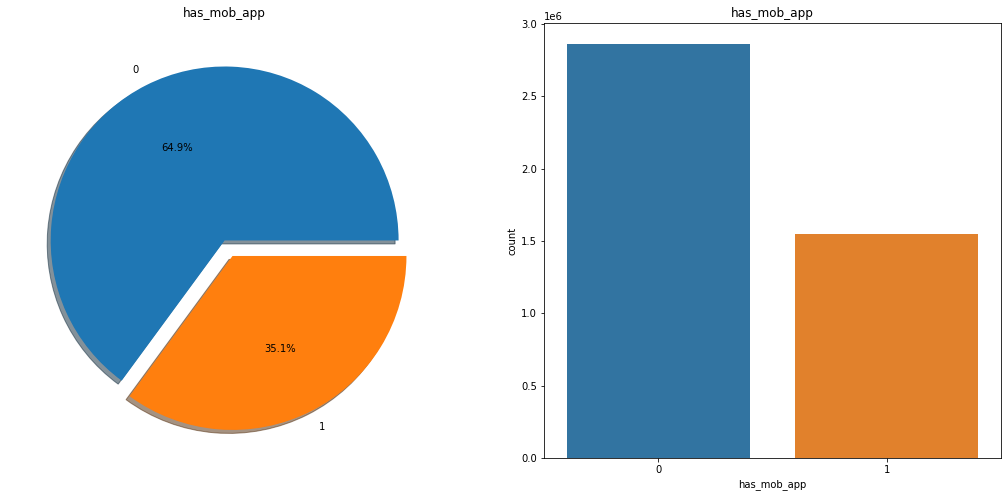

In [134]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_overall['has_mob_app'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('has_mob_app')
ax[0].set_ylabel('')
sns.countplot('has_mob_app',data=df_overall[(df_overall['has_mob_app'].notnull())],ax=ax[1])
ax[1].set_title('has_mob_app')
plt.show()

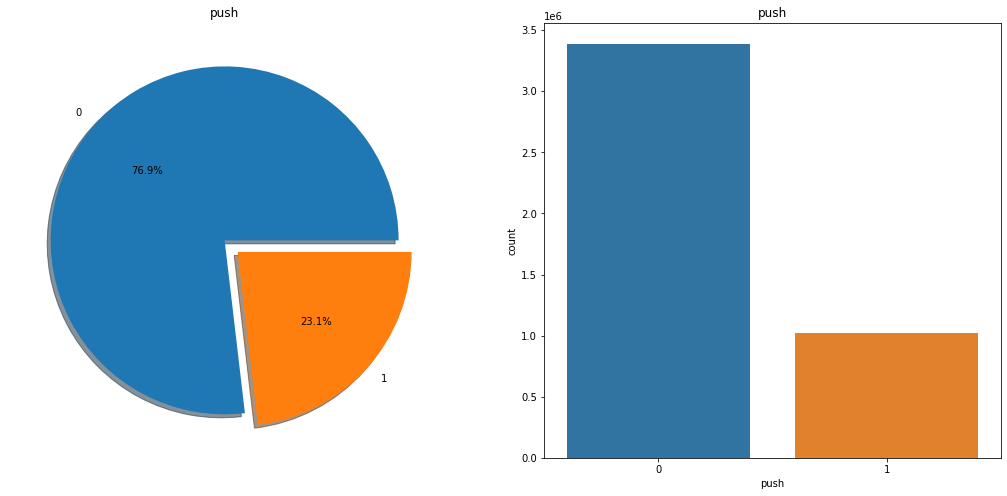

In [136]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_overall['push'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('push')
ax[0].set_ylabel('')
sns.countplot('push',data=df_overall[(df_overall['push'].notnull())],ax=ax[1])
ax[1].set_title('push')
plt.show()

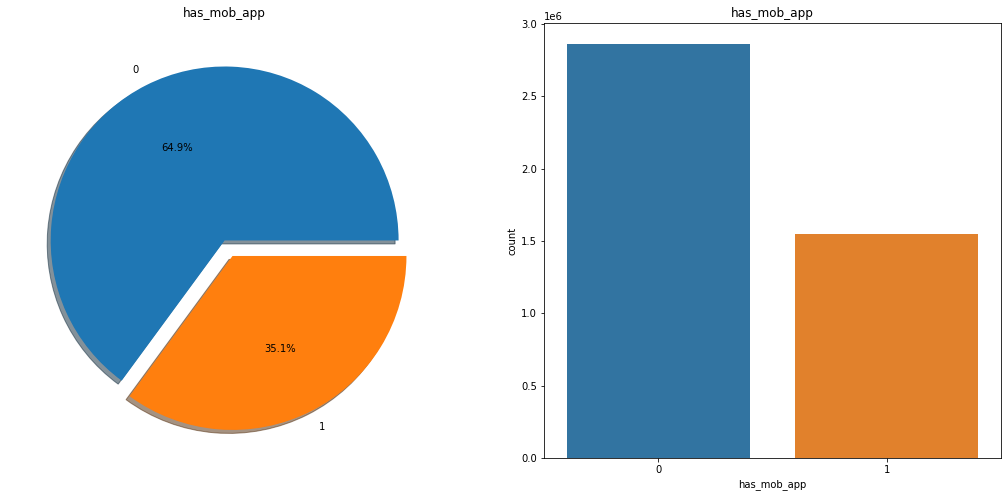

In [139]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_overall['has_mob_app'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('has_mob_app')
ax[0].set_ylabel('')
sns.countplot('has_mob_app',data=df_overall[(df_overall['has_mob_app'].notnull())],ax=ax[1])
ax[1].set_title('has_mob_app')
plt.show()

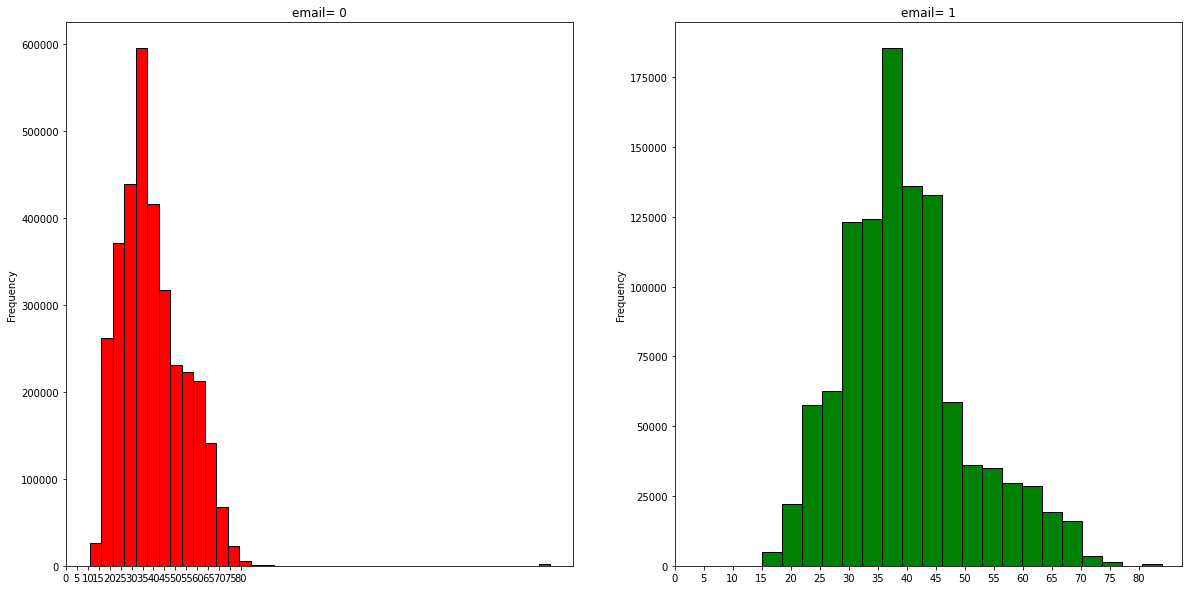

In [140]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_overall[df_overall['email']==0].customer_age.plot.hist(ax=ax[0],bins=40,edgecolor='black',color='red')
ax[0].set_title('email= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_overall[df_overall['email']==1].customer_age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('email= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

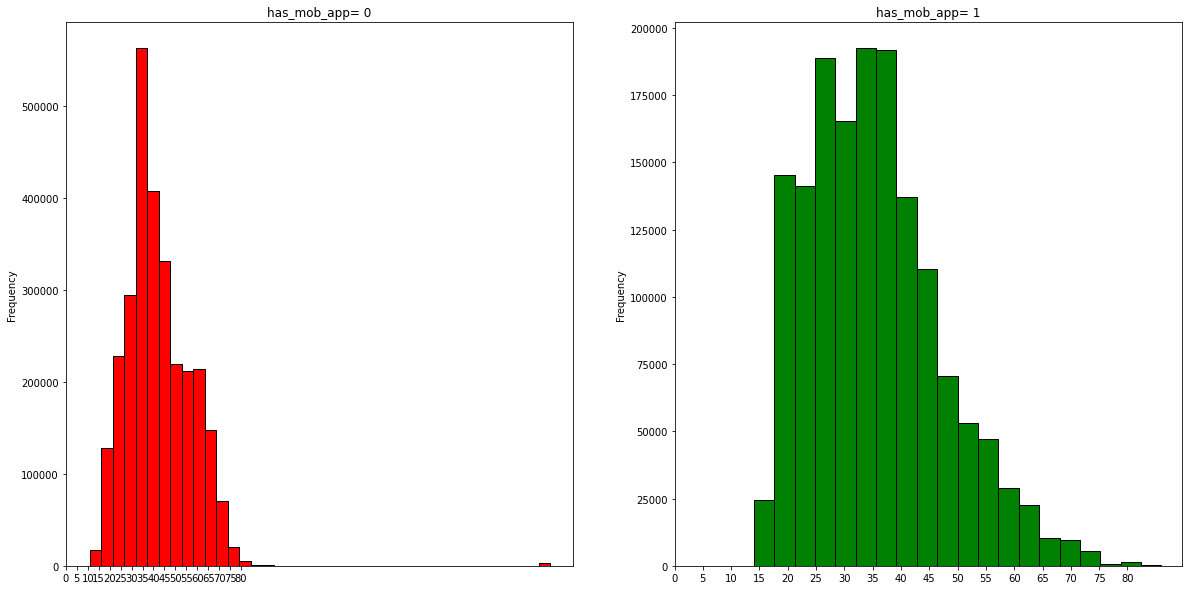

In [141]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_overall[df_overall['has_mob_app']==0].customer_age.plot.hist(ax=ax[0],bins=40,edgecolor='black',color='red')
ax[0].set_title('has_mob_app= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_overall[df_overall['has_mob_app']==1].customer_age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('has_mob_app= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

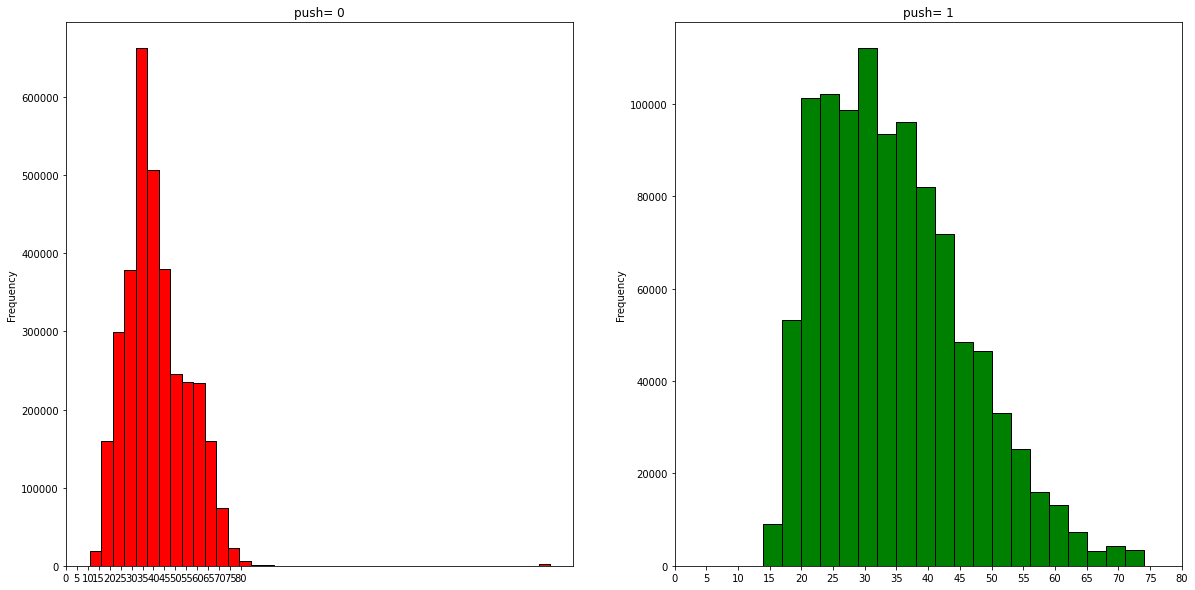

In [142]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_overall[df_overall['push']==0].customer_age.plot.hist(ax=ax[0],bins=40,edgecolor='black',color='red')
ax[0].set_title('push= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_overall[df_overall['push']==1].customer_age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('push= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [143]:
n_orders = df_overall.groupby(['uid1'])['date_pur'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df_overall['uid1'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

99.12% of customers ordered more than once.


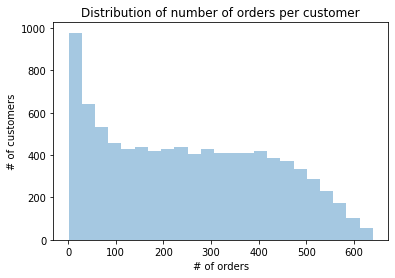

In [144]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [145]:
# create monthly cohorts matrix with average spending
cohort_pivot_spending = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'transaction_amt_mean')
cohort_pivot_spending.round(1)
cohort_pivot_spending.head()

period_number,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
cohort,,,,,,,,,,,,,,,,,,,,,
2020-01,786.398860,786.277593,784.218249,750.454729,782.945943,803.698675,804.829074,841.363055,845.936614,800.619485,...,934.327660,925.928390,914.852976,892.293965,883.791904,871.723948,864.085555,891.010295,876.807585,929.627059
2020-02,801.205180,740.345170,822.238790,697.642384,746.436989,715.575693,717.138495,724.368495,740.161449,733.082987,...,830.436710,721.428178,801.462473,749.714063,739.223040,720.412663,757.212121,698.285422,666.362947,NaN
2020-03,914.303383,571.365495,627.215784,657.602841,649.949804,574.621915,638.746931,641.715296,778.767452,759.636876,...,879.603928,693.453308,731.424363,687.801241,757.935008,721.393898,791.776935,840.412576,NaN,NaN
2020-04,749.350822,764.399856,645.254000,731.122268,767.307086,693.007799,725.668409,735.916327,820.878610,681.680693,...,702.641187,708.739542,747.831647,794.284774,766.958048,911.082170,768.664774,NaN,NaN,NaN
2020-05,811.069157,567.847562,610.648178,648.727356,694.188792,566.664250,600.727126,897.610531,806.230976,566.350131,...,646.996492,623.503961,632.982236,868.020407,785.047060,717.680012,NaN,NaN,NaN,NaN


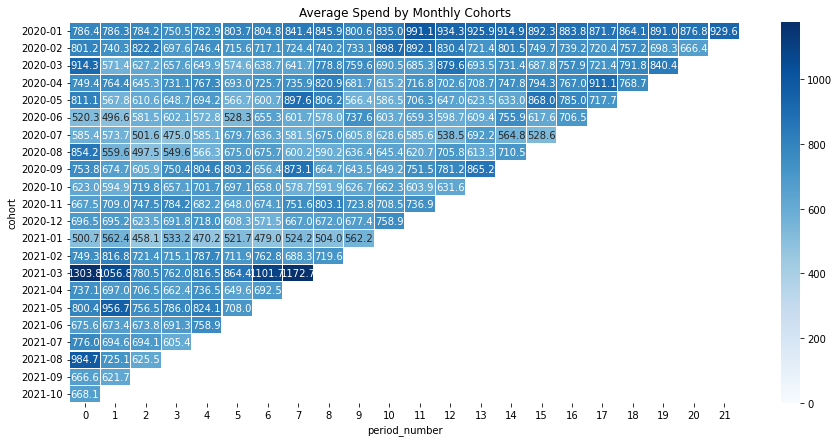

In [146]:
# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = cohort_pivot_spending,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(cohort_pivot_spending.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.1)
plt.show();

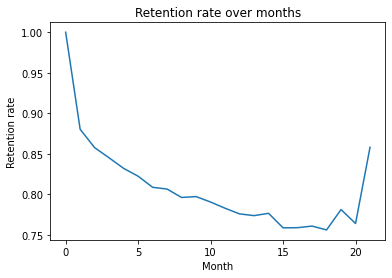

In [147]:
plt.plot(retention_matrix.agg('mean'))
plt.title('Retention rate over months')
plt.xlabel('Month')
plt.ylabel('Retention rate')
plt.show()

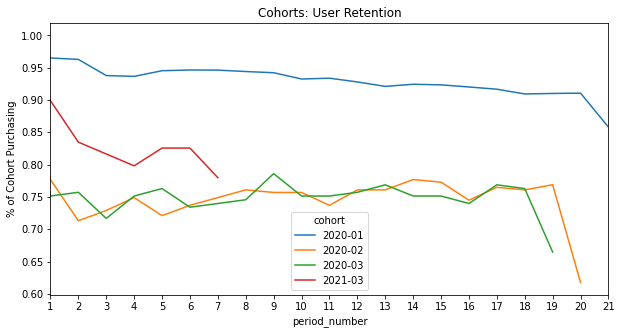

In [148]:
retention_matrix.T[['2020-01', '2020-02', '2020-03', '2021-03']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 21.1, 1))
plt.xlim(1, 21)
plt.ylabel('% of Cohort Purchasing');

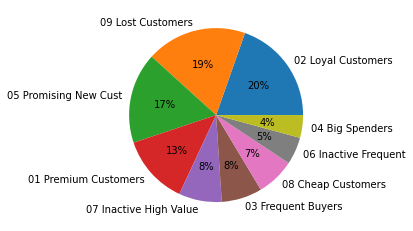

In [149]:
plt.pie(rfmSeg.RFM_Segment.value_counts(),
        labels=rfmSeg.RFM_Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

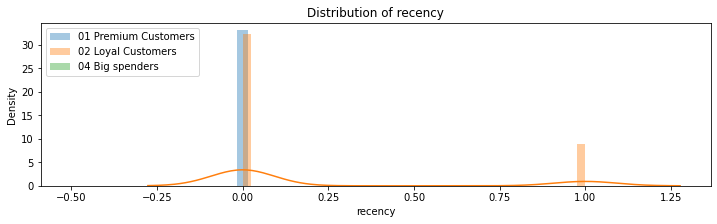

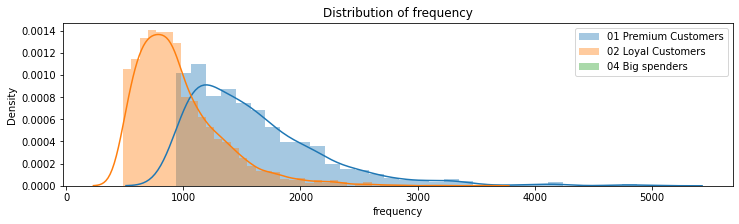

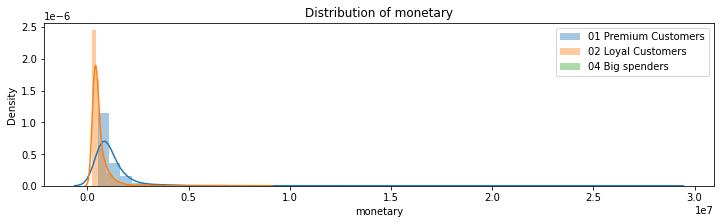

In [150]:
colnames = ['recency', 'frequency', 'monetary']
segments = ['01 Premium Customers', '02 Loyal Customers', '04 Big spenders']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(rfmSeg[rfmSeg['RFM_Segment']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

In [151]:
agg_dict2 = {
    'uid1': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'sum'
}

df_analysis = rfmSeg.groupby('RFM_Segment').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'RFM_Segment': 'label', 'uid1': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary'] / df_analysis['monetary'].sum()
df_analysis['monetary'] = df_analysis['monetary'] / df_analysis['count']

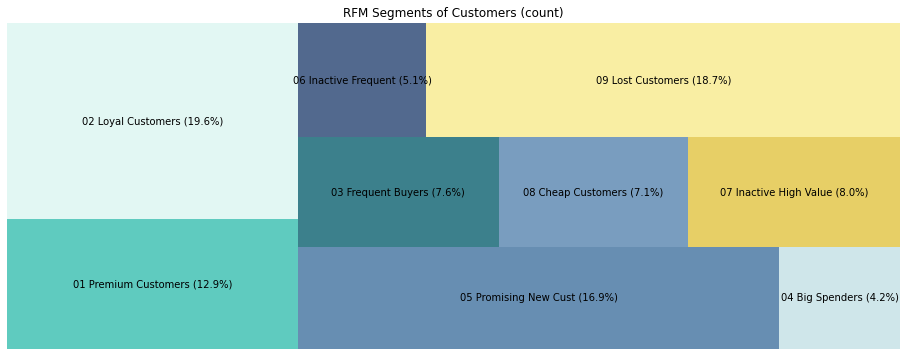

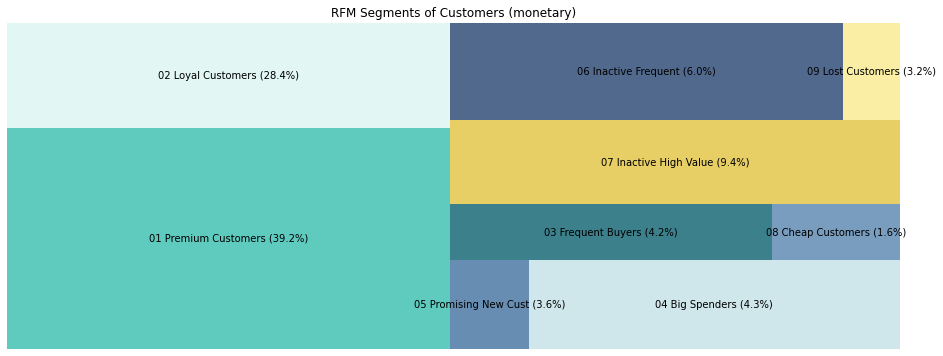

In [152]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

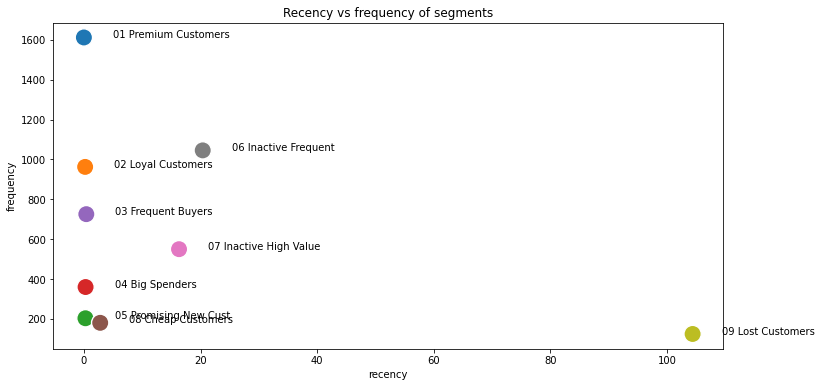

In [153]:
fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()